In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf


os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image

from PIL import Image

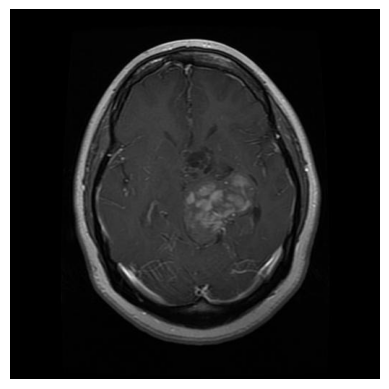

In [2]:
image_path = 'MRI_DATA/Training/glioma_tumor/gg (1).jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_width, image_height = 224, 224

# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,   # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    validation_split=0.2)  # Here we specify the validation split

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'MRI_DATA/Training/',
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training')  # Set as training data

# Flow validation images in batches using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        'MRI_DATA/Training/',  # point to the same directory as for the training data
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# input size
input_shape = (224, 224, 3)

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 56, 56, 128)       7

In [5]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# training the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/100
71/71 [==============================] - 156s 2s/step - loss: 1.2332 - accuracy: 0.4269 - val_loss: 1.1846 - val_accuracy: 0.4412
Epoch 2/100
71/71 [==============================] - 142s 2s/step - loss: 0.9172 - accuracy: 0.5951 - val_loss: 1.1383 - val_accuracy: 0.4926
Epoch 3/100
71/71 [==============================] - 137s 2s/step - loss: 0.8224 - accuracy: 0.6331 - val_loss: 1.0715 - val_accuracy: 0.5331
Epoch 4/100
71/71 [==============================] - 137s 2s/step - loss: 0.6885 - accuracy: 0.7042 - val_loss: 0.9201 - val_accuracy: 0.5184
Epoch 5/100
71/71 [==============================] - 137s 2s/step - loss: 0.6246 - accuracy: 0.7280 - val_loss: 1.0338 - val_accuracy: 0.5349
Epoch 6/100
71/71 [==============================] - 139s 2s/step - loss: 0.5710 - accuracy: 0.7563 - val_loss: 0.9067 - val_accuracy: 0.5699
Epoch 7/100
71/71 [==============================] - 141s 2s/step - loss: 0.5227 - accuracy: 0.7850 - val_loss: 0.9390 - val_accuracy: 0.6324
Epoch 

In [7]:
# rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# create the test_generator
test_generator = test_datagen.flow_from_directory(
    'MRI_DATA/Testing/',
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f'Test accuracy: {test_acc*100:.2f}%')


Found 394 images belonging to 4 classes.


6/6 [==============================] - 6s 973ms/step - loss: 5.0108 - accuracy: 0.7057
Test accuracy: 70.57%


# Actual test

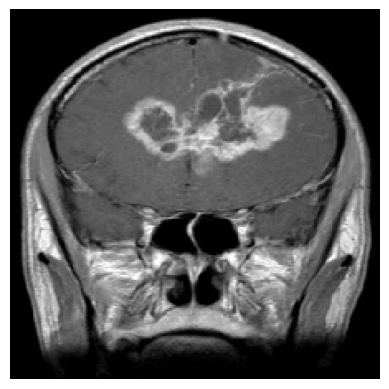

In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to specific image
image_path = 'MRI_DATA/Testing/glioma_tumor/image(1).jpg'

# Load the image and resize it to match the input shape
img = image.load_img(image_path, target_size=(image_width, image_height))

# Display the loaded image
plt.imshow(img)
plt.axis('off')  # Remove axes for clarity
plt.show()

# Convert the image to a numpy array and rescale
img_array = image.img_to_array(img) / 255.

# Add an extra dimension for the batch size
img_array = np.expand_dims(img_array, axis=0)

In [9]:
# Make predictions
predictions = model.predict(img_array)

# Display the predictions
print(f"Raw predictions: {predictions}")

# Determine the predicted class
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class index: {predicted_class}")

class_names = ['glioma', 'meningioma', 'no', 'pituitary']
print(f"Predicted class name: {class_names[predicted_class[0]]}")

# probabilities in a more readable format
print(f"Prediction probabilities: {np.round(predictions[0], 2)}")

1/1 [==============================] - 0s 300ms/step
Raw predictions: [[2.61766513e-06 9.99234319e-01 7.62973912e-04 1.14369804e-07]]
Predicted class index: [1]
Predicted class name: meningioma
Prediction probabilities: [0. 1. 0. 0.]
